In [1]:
from plio.io.io_moon_minerology_mapper import M3
from libpyhat.examples import get_path

%pylab inline

No libpyhat module. Unable to attached derived product functions
Populating the interactive namespace from numpy and matplotlib


## Basic M3 I/O

In [2]:
m = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

## Visualize one of the bands by index

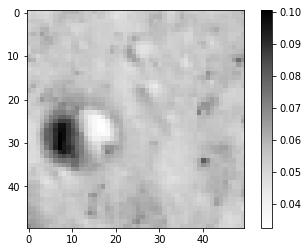

In [3]:
imshow(m[0], cmap='Greys')
colorbar()

## Get the available wavelengths

In [4]:
m.wavelengths

array([ 540.84,  580.76,  620.69,  660.61,  700.54,  730.48,  750.44,
        770.4 ,  790.37,  810.33,  830.29,  850.25,  870.21,  890.17,
        910.14,  930.1 ,  950.06,  970.02,  989.98, 1009.95, 1029.91,
       1049.87, 1069.83, 1089.79, 1109.76, 1129.72, 1149.68, 1169.64,
       1189.6 , 1209.57, 1229.53, 1249.49, 1269.45, 1289.41, 1309.38,
       1329.34, 1349.3 , 1369.26, 1389.22, 1409.19, 1429.15, 1449.11,
       1469.07, 1489.03, 1508.99, 1528.96, 1548.92, 1578.86, 1618.79,
       1658.71, 1698.63, 1738.56, 1778.48, 1818.4 , 1858.33, 1898.25,
       1938.18, 1978.1 , 2018.02, 2057.95, 2097.87, 2137.8 , 2177.72,
       2217.64, 2257.57, 2297.49, 2337.42, 2377.34, 2417.26, 2457.19,
       2497.11, 2537.03, 2576.96, 2616.88, 2656.81, 2696.73, 2736.65,
       2776.58, 2816.5 , 2856.43, 2896.35, 2936.27, 2976.2 ])

## Visualize by wavelength with tolerances enabled

The idea behind tolerances is to be able to control how many decimal places are included for label based access.  The default tolerance is 2, meaning that all wavelength labels (not the actual values, but the labels by which data are accessible) is rounded to two decimal places.

Below, we access the private variable `_original_wavelengths` to demonstrate that the actual wavelengths are being preserverd.  We can compate the final entry `700.539978` with the label representation `700.54` (above).

In [5]:
m._original_wavelengths[:5]

[540.840027, 580.76001, 620.690002, 660.609985, 700.539978]

It is possible to alter the labels by altering the tolerance value.  For example, below the tolerance is set to five decimal places.

In [6]:
m.tolerance = 5
m.wavelengths[:5]  # Print the first 5 wavelengths

array([540.84003, 580.76001, 620.69   , 660.60999, 700.53998])

In [7]:
m.tolerance = 2

## Label Based Access

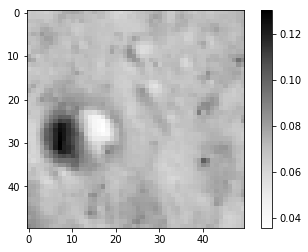

In [8]:
imshow(m.loc[700], cmap='Greys')
colorbar()

In [9]:
m.wavelengths

array([ 540.84,  580.76,  620.69,  660.61,  700.54,  730.48,  750.44,
        770.4 ,  790.37,  810.33,  830.29,  850.25,  870.21,  890.17,
        910.14,  930.1 ,  950.06,  970.02,  989.98, 1009.95, 1029.91,
       1049.87, 1069.83, 1089.79, 1109.76, 1129.72, 1149.68, 1169.64,
       1189.6 , 1209.57, 1229.53, 1249.49, 1269.45, 1289.41, 1309.38,
       1329.34, 1349.3 , 1369.26, 1389.22, 1409.19, 1429.15, 1449.11,
       1469.07, 1489.03, 1508.99, 1528.96, 1548.92, 1578.86, 1618.79,
       1658.71, 1698.63, 1738.56, 1778.48, 1818.4 , 1858.33, 1898.25,
       1938.18, 1978.1 , 2018.02, 2057.95, 2097.87, 2137.8 , 2177.72,
       2217.64, 2257.57, 2297.49, 2337.42, 2377.34, 2417.26, 2457.19,
       2497.11, 2537.03, 2576.96, 2616.88, 2656.81, 2696.73, 2736.65,
       2776.58, 2816.5 , 2856.43, 2896.35, 2936.27, 2976.2 ])

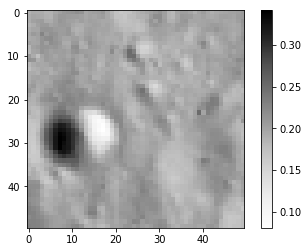

In [10]:
imshow(m.loc[2616], cmap='Greys')
colorbar()

## Label Based Access in an ROI
Suppose that the crater is of particular interest.  In this isntance, a slice can be taken from the data where the indexer looks like `[1149, 20:40, 0:20]`.  The first element (`1149`) is the label wavelength.  The second (`20:40`, y-axis) and third (`0:20`, x-axis) are positional in pixel space and are in `start:stop` form.

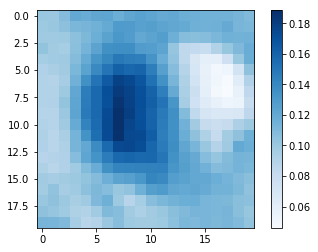

In [11]:
imshow(m.loc[1149, 20:40, 0:20], cmap='Blues')
colorbar()

## Label Based Access for an RGB False Color
Here 3 bands are pulled from the image and not ROI is defined.  Notice that the three bands are specified inside of a list `[1978, 540, 770]` and that that list is inside of the `loc` list, e.g., `[[1978, 540, 770]]`.  If one wanted to also specify an ROI, the syntax would be `[[1978, 540, 770], ystart:ystop, xstart:xstop]`.

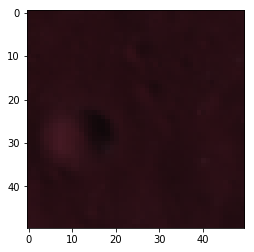

In [12]:
arr = m.loc[[1978, 540, 770]]
arr = np.moveaxis(arr, 0, -1)  # The axis movement is required for a 3 band plot.
imshow(arr)

In [20]:
from libpyhat.derived.m3 import pipe, new, development_funcs, supplemental

## What are the available derived products for M3.pipe?

In [21]:
available = [i for i in dir(pipe) if not i.startswith('__')]
print(available)

['bd1050', 'bd1250', 'bd1900', 'bd1umratio', 'bd2300', 'bd2umratio', 'bd3000', 'bd620', 'bd950', 'bdi1000', 'bdi2000', 'hlnd_isfeo', 'nbd1400', 'nbd1480', 'nbd2300', 'nbd2700', 'nbd2850', 'np', 'olindex', 'oneum_min', 'oneum_slope', 'oneum_sym', 'pf', 'r1580', 'r2780', 'r540', 'r750', 'r950_750', 'thermal_ratio', 'thermal_slope', 'twoum_ratio', 'twoum_slope', 'utils', 'uvvis', 'visnir', 'visslope', 'visuv', 'warnings']


### Band Depth @ 620

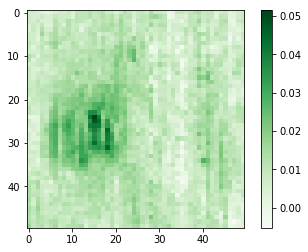

In [22]:
imshow(pipe.bd1900(m), cmap='Greens')
colorbar()

### H20 1st Algorithm

In [26]:
# TODO: Does this still exist? Find out to see if we can delete this cell.

imshow(development_funcs.h2o1(m), cmap='Blues')
colorbar()

AttributeError: module 'libpyhat.derived.m3.development_funcs' has no attribute 'h2o1'

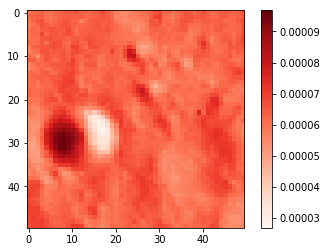

In [18]:
imshow(pipe.twoum_slope(m), cmap='Reds')
colorbar()

## Derived Product with an ROI
This is currently not an ideal solution and we are thinking about how better to implement this. In short, the convenience functions, e.g., `pipe.twoum_slope` expect to get a `GeoDataset` object (what the m3 object is in this notebook).  When we start to slice (subset to an ROI) a standard numpy array is returned.  Therefore, the `pipe.twoum_slope` function will not work directly on a subset. The `pipe.twoum_slope` dispatches to another function that does the heavy lifting.  In the example, below, we call that function directly.  

In the short term, we suggest that end users subset their images to some ROI using a tool like gdal_translate and use those data within PyHAT.

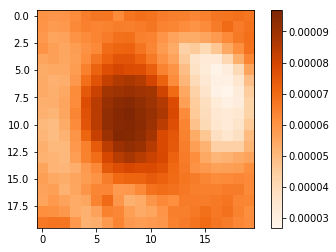

In [19]:
from libpyhat.derived.m3 import pipe_funcs
imshow(pipe_funcs.twoum_slope_func(m.loc[[1578, 2538], 20:40, 0:20]), cmap='Oranges')
colorbar()